In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,uniform
import warnings

%matplotlib inline
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

SEED = 42
np.random.seed(SEED)

# Linear Basis Model

$f(x_i, W) = w_0 + \sum_{j=1}^{M-1} w_j \phi_j(x_i)$ where $\phi_j(x)$ be basis function

Now define $\phi_0(x) = 1$, then $f(x_i,W) = W^T\phi(x_i)$

Ex. Let basis function be gaussian, i.e. $\phi_j(x) = exp[-\frac{(x-\mu_j)^2}{2s^2}]$.

LSE $W^* = (\Phi^T\Phi)^{-1}\Phi^Ty$ where $\Phi = (\phi_0(X), \phi_1(X), ..., \phi_{M-1}(X)) \in \mathbb{R}^{N \times M}$

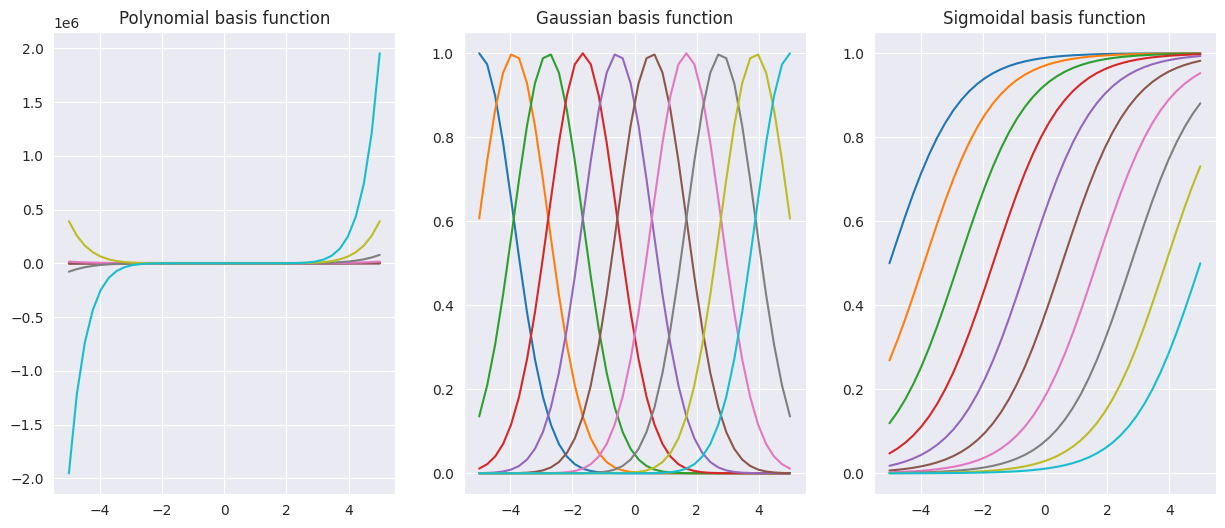

In [ ]:
def gaussian_basis(x,mu,s):
    return np.exp(-(x-mu)**2/(2*s**2))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoidal_basis(x,mu,s):
    return sigmoid((x-mu)/s)

M = 10
mu = np.linspace(-5,5, M)
s = mu[1] - mu[0]

xb = np.linspace(-5,5, 40)

plt.figure(figsize=(15,6))

plt.subplot(131)
for j in range(M):
  y = xb**j
  plt.plot(xb, y)
plt.title("Polynomial basis function")

plt.subplot(132)
for j in range(M):
  y = gaussian_basis(xb, mu[j], s)
  plt.plot(xb, y)
plt.title("Gaussian basis function")

plt.subplot(133)
for j in range(M):
  y = sigmoidal_basis(xb, mu[j], s)
  plt.plot(xb, y)
plt.title("Sigmoidal basis function")

plt.show()

## Example

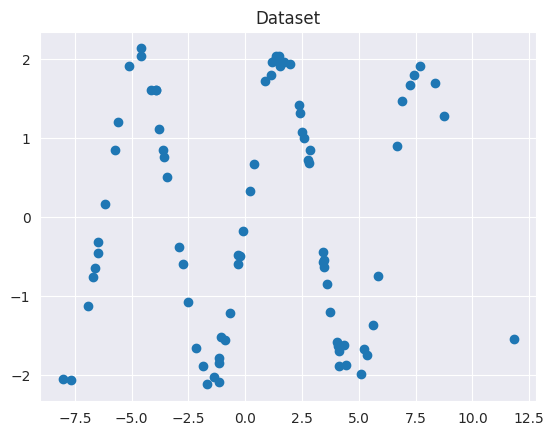

In [ ]:
N = 80
X = 5*np.random.randn(N,1)
y = 2 * np.sin(X).flatten() + np.random.normal(0, 0.1, X.shape[0]) # add noise
plt.scatter(X,y)
plt.title("Dataset")
plt.show()

In [ ]:
M = 10
basis_means = np.linspace(np.min(X), np.max(X), M)
scale = basis_means[1] - basis_means[0]
Phi = np.zeros((N,M)) # (number of samples) * (number of bases)

for m in range(M):
    Phi[:,m] = gaussian_basis(X,basis_means[m],s=scale).reshape(N,)

W = np.linalg.inv(Phi.T@Phi)@Phi.T@y
W.shape

(10,)

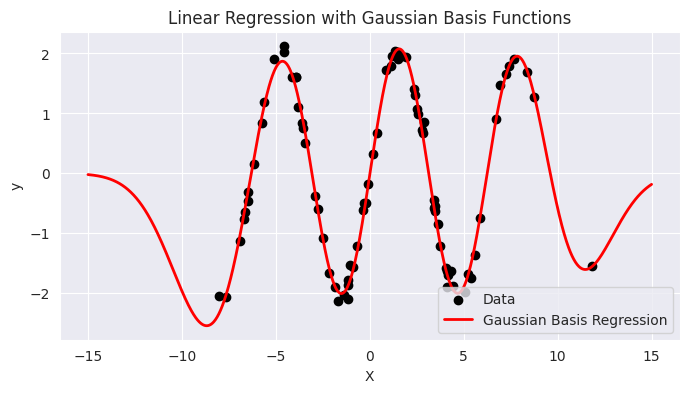

In [ ]:
W = W.reshape(-1,1)
X_pred = np.linspace(-15, 15, 1000)[:, np.newaxis]
Phi_pred = np.zeros((1000,M))

for m in range(M):
    Phi_pred[:,m] = gaussian_basis(X_pred,basis_means[m],s=scale).reshape(1000,)

plt.figure(figsize=(8,4))
plt.scatter(X, y, color='black', label='Data')
plt.plot(X_pred, Phi_pred@W, color='red', linewidth=2, label='Gaussian Basis Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Gaussian Basis Functions')
plt.legend(loc='lower right')
plt.show()

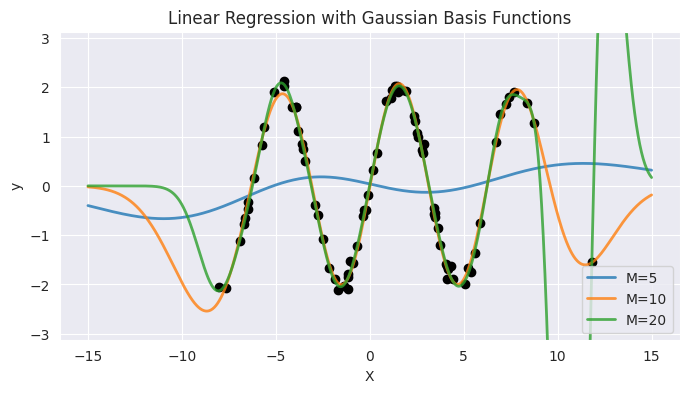

In [ ]:
def gaussian_plot(M=10):
    basis_means = np.linspace(np.min(X), np.max(X), M)
    scale = basis_means[1] - basis_means[0]
    Phi = np.zeros((N,M)) # (number of samples) * (number of bases)

    for m in range(M):
        Phi[:,m] = gaussian_basis(X,basis_means[m],s=scale).reshape(N,)

    W = np.linalg.inv(Phi.T@Phi)@Phi.T@y
    W = W.reshape(-1,1)

    Phi_pred = np.zeros((1000,M))

    for m in range(M):
        Phi_pred[:,m] = gaussian_basis(X_pred,basis_means[m],s=scale).reshape(1000,)

    plt.plot(X_pred, Phi_pred@W, linewidth=2, label="M="+str(M),alpha=0.8)


plt.figure(figsize=(8,4))
plt.scatter(X, y, color='black')
gaussian_plot(5)
gaussian_plot(10)
gaussian_plot(20)
plt.ylim(np.min(y)-1,np.max(y)+1)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Gaussian Basis Functions')
plt.legend(loc='lower right')
plt.show()

# The Bias-Variance Decomposition

$\mathbb{E}[Y|X] = argmin_{h(x)} \mathbb{E}[(Y-h(X))^2|X] = f(X)$

\begin{array} \mathbb{E}[L] &= \int \{ \mathbb{E}_{\mathcal{D}}[h(x)] - f(x) \}^2p(x)dx + \int \mathbb{E}_{\mathcal{D}}[ \{ h(x) - \mathbb{E}_{\mathcal{D}}[h(x)] \}^2]p(x)dx + \int \int (h(x)-y)^2p(x,y)dxdy \\ &= (\text{bias})^2 + \text{variance} + \text{noise} \end{array}

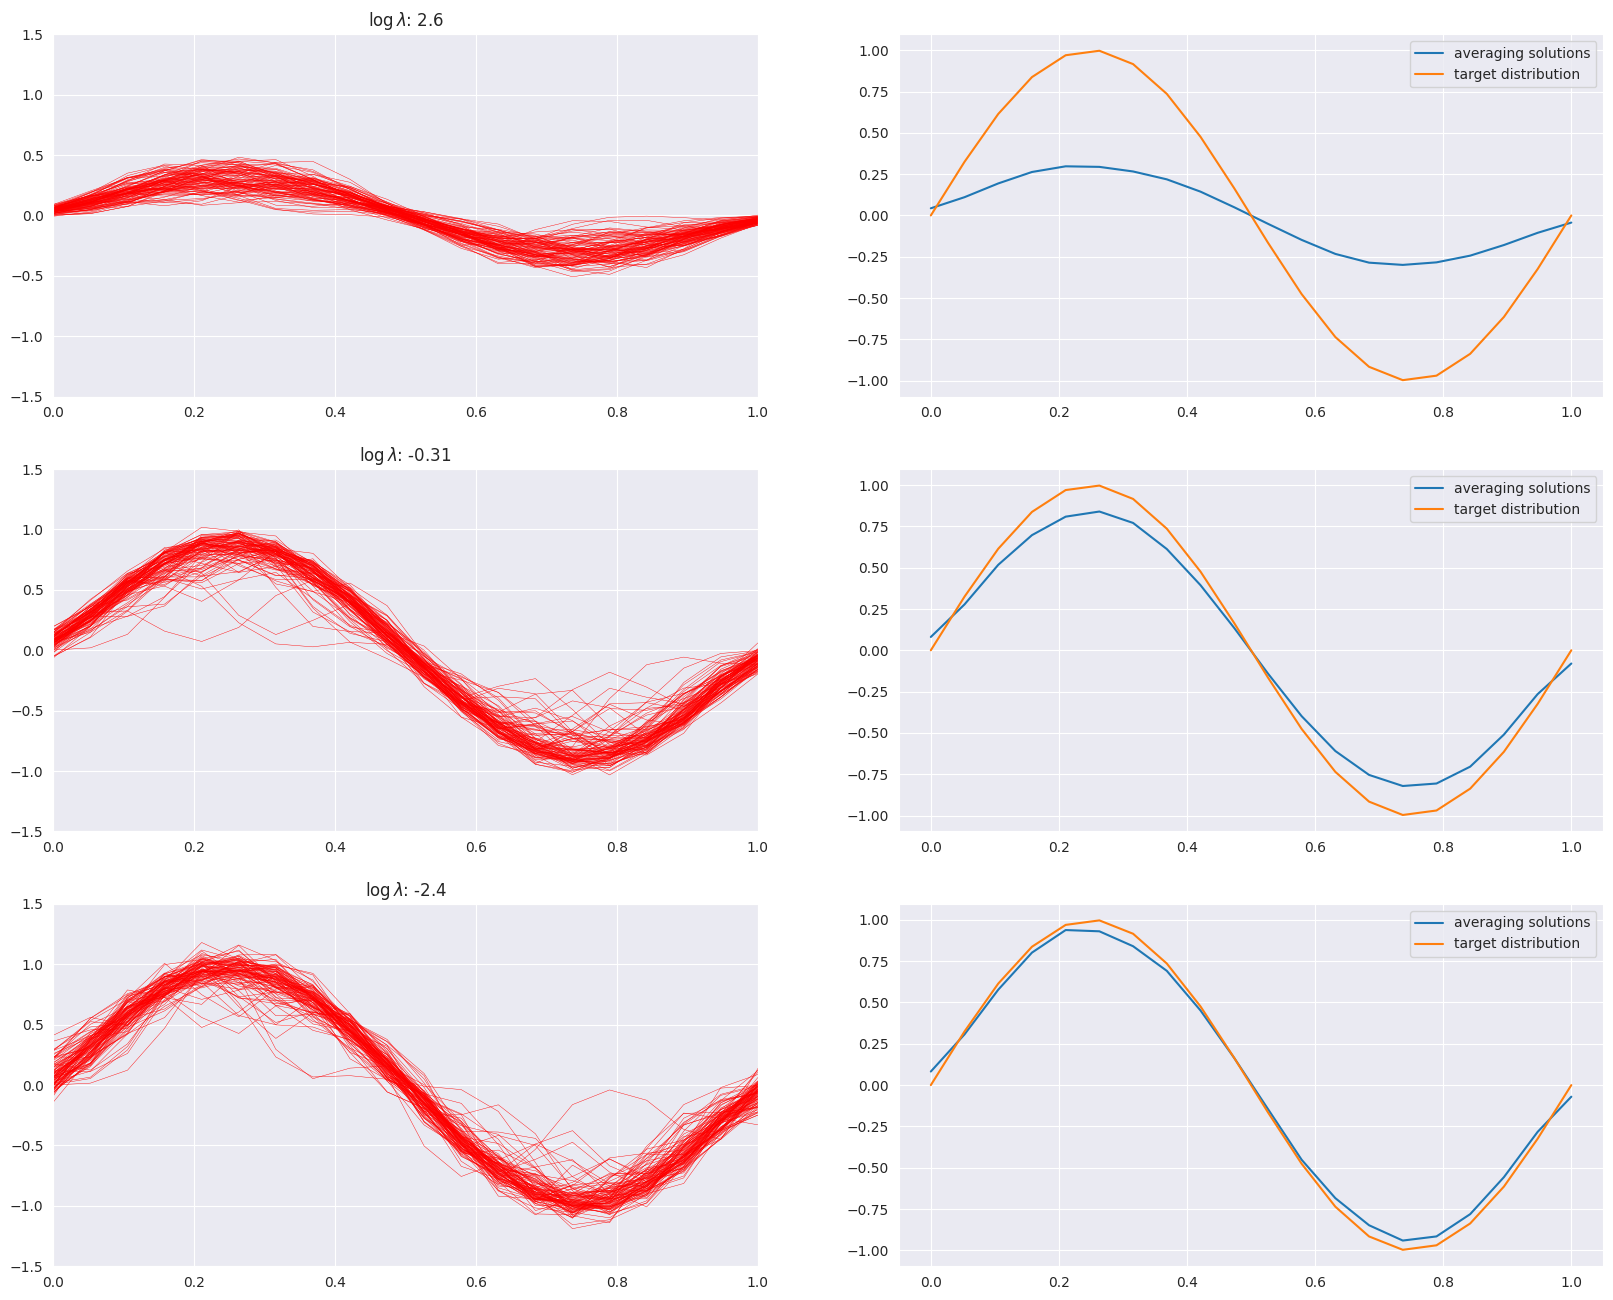

In [ ]:
def generate_gaussian_plot(M=24, N=25,reg=0.0):
    X = uniform.rvs(size=N)
    y = np.sin(2*np.pi*X).flatten() + np.random.normal(0, 0.1, X.shape[0]) # add noise

    basis_means = np.linspace(0, 1, M)
    scale = basis_means[1] - basis_means[0]
    Phi = np.zeros((N,M)) # (number of samples) * (number of bases)

    for m in range(M):
        Phi[:,m] = gaussian_basis(X,basis_means[m],s=scale).reshape(N,)

    W = np.linalg.pinv(reg*np.eye(M) + Phi.T@Phi)@Phi.T@y
    W = W.reshape(-1,1)

    X_pred = np.linspace(0, 1, 20)[:, np.newaxis]
    Phi_pred = np.zeros((20,M))

    for m in range(M):
        Phi_pred[:,m] = gaussian_basis(X_pred,basis_means[m],s=scale).reshape(20,)

    plt.plot(X_pred, Phi_pred@W, linewidth=0.3,color='red')
    plt.xlim(0,1)
    plt.ylim(-1.5,1.5)

    return Phi_pred@W

def reg_gaussian_plot(reg):
    y = np.zeros((20,1))
    for _ in range(100):
        y += generate_gaussian_plot(reg=reg)

    y /= 100
    return y

regs = [np.exp(2.6), np.exp(-0.31), np.exp(-2.4)]

plt.figure(figsize=(20,16))
for i, reg in enumerate(regs):
    plt.subplot(3,2,2*i+1)
    y = reg_gaussian_plot(reg=reg)
    plt.title("$\log \lambda$: " + str(np.round(np.log(reg),2)))
    plt.subplot(3,2,2*i+2)
    xx =  np.linspace(0, 1, 20)[:, np.newaxis]
    plt.plot(xx, y, label='averaging solutions')
    plt.plot(xx,np.sin(2*np.pi*xx), label='target distribution')
    plt.legend()

# check that ln(reg) = 2.6 model has high bias, low variance, ln(reg) = -2.4 model has high variance, low bias
# ln(reg) = -0.31 be best model